In [69]:
import pandas as pd
from datetime import datetime
from dateutil import parser
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [45]:
df_final = pd.read_csv('../data/cobros_final.csv')
df_pagare = pd.read_csv('../data/Capital_Pagare.csv').rename(columns= {"idcredito":"idCredito"})

C:\Users\angel\AppData\Local\Temp\ipykernel_28960\661473134.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final = pd.read_csv('../data/cobros_final.csv')


In [61]:
df_final.head()

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,fechaCreacionLista,fechaEnvioCobro,idEmisora,mes,anio
0,100613,83021,27169966,BANAMEX,572.24,572.24,0.0,NaN,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,2022-09-30,Banamex Excepciones Cuenta ...,9,2022
1,100613,87227,27169937,BANAMEX,517.74,517.74,0.0,NaN,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,2022-09-30,Banamex Excepciones Cuenta ...,9,2022
2,100613,103785,27169946,BANAMEX,681.23,681.23,0.0,NaN,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,2022-09-30,Banamex Excepciones Cuenta ...,9,2022
3,100613,110463,27169969,BANAMEX,572.24,572.24,0.0,NaN,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,2022-09-30,Banamex Excepciones Cuenta ...,9,2022
4,100613,113755,27169948,BANAMEX,340.62,340.62,0.0,NaN,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,2022-09-30,Banamex Excepciones Cuenta ...,9,2022


In [46]:
# Change fechaEnvioCobro to datetime
df_final['fechaEnvioCobro'] = pd.to_datetime(df_final['fechaEnvioCobro'], format='%d/%m/%Y')

In [47]:
# Extracting the month and year from fechaEnvioCobro
df_final['mes'] = df_final['fechaEnvioCobro'].dt.month
df_final['anio'] = df_final['fechaEnvioCobro'].dt.year

In [ ]:
mes= 1
anio= 2023
# Filter the DataFrame for the specified month and year
df_mes_actual = df_final[(df_final["mes"]== mes)& (df_final["anio"]== anio) ]
df_mes_siguiente = df_final[(df_final["mes"]== mes)& (df_final["anio"]== anio) ]

df_mes_sig_grouped = df_mes_siguiente.groupby("idCredito").agg({"montoCobrado":"sum"}).rename(columns={"montoCobrado":"montoCobradomessig"}).reset_index()


df_mes_actual_group = df_final.groupby('idCredito').agg(
    montoExigible=('montoExigible', 'sum'),
    montoCobrar=('montoCobrar', 'sum'),
    montoCobrado=('montoCobrado', 'sum'),
    vecesPagadas=('montoCobrado', 'sum'),
    totalCobros=('montoCobrado', 'count'),
    ultimoCobro=('fechaEnvioCobro', 'max')
).reset_index()
df_mes_actual_group['proporcionPagos'] = df_mes_actual_group['vecesPagadas'] / df_mes_actual_group['totalCobros']

df_mes_actual_joined = df_mes_actual_group.merge(df_pagare, on='idCredito', how='inner')

df_mes_sig_joined = df_mes_actual_joined.merge(df_mes_sig_grouped, on='idCredito', how='left')
df_mes_sig_joined['proporcionPagadaMessig'] = df_mes_sig_joined['montoCobradomessig'] / df_mes_sig_joined['pagare']

# Replace NaN values with 0
df_mes_sig_joined['proporcionPagadaMessig'] = df_mes_sig_joined['proporcionPagadaMessig'].fillna(0)
df_mes_sig_joined['montoCobradomessig'] = df_mes_sig_joined['montoCobradomessig'].fillna(0)
df_mes_sig_joined


,idCredito,montoExigible,montoCobrar,montoCobrado,vecesPagadas,totalCobros,ultimoCobro,proporcionPagos,pagare,capital,fechaAperturaCredito,montoCobradomessig,proporcionPagadaMessig
0,6,750.94,750.94,0.00,0.00,2,2023-08-14,0.000,27033.84,12000.0,12/3/2012,0.0,0.0
1,560,572.44,572.44,0.00,0.00,1,2022-10-25,0.000,27477.12,13000.0,13/03/2012,0.0,0.0
2,773,782.24,782.24,0.00,0.00,2,2022-10-25,0.000,28160.64,12500.0,15/03/2012,0.0,0.0
3,1154,185.46,185.46,0.00,0.00,2,2022-10-25,0.000,6676.56,2500.0,15/03/2012,0.0,0.0
4,1315,750.94,750.94,0.00,0.00,2,2022-10-25,0.000,27033.84,12000.0,20/03/2012,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97223,755683,585.33,585.33,585.33,585.33,1,2025-05-14,585.330,28095.84,10000.0,7/5/2025,0.0,0.0
97224,755695,2654.48,2654.48,2654.48,2654.48,1,2025-05-14,2654.480,127415.04,45350.0,7/5/2025,0.0,0.0
97225,755726,3149.99,3149.99,3149.99,3149.99,1,2025-05-19,3149.990,163799.48,58300.0,8/5/2025,0.0,0.0
97226,755859,35145.48,35145.48,0.00,0.00,16,2025-05-22,0.000,152297.08,54206.0,9/5/2025,0.0,0.0


In [ ]:
df = df_mes_sig_joined

X= df.drop(columns=['idCredito', 'montoCobradomessig', 'proporcionPagadaMessig','ultimoCobro'])
# Transform fechaEnvioCobro into month and day
X['fechaAperturaCredito'] = pd.to_datetime(X['fechaAperturaCredito'], format='%d/%m/%Y')

X['month_fa'] = X['fechaAperturaCredito'].dt.month
X['day_fa'] = X['fechaAperturaCredito'].dt.day
X['year_fa'] = X['fechaAperturaCredito'].dt.year

# Drop the column 'fechaAperturaCredito'
X.drop(columns=['fechaAperturaCredito'], inplace=True)
y = df['proporcionPagadaMessig']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 0.0010312165490526863
R² Score: 0.0670558524130519


In [ ]:
mes= 1
anio= 2023
# Filter the DataFrame for the specified month and year
df_mes_actual = df_final[(df_final["mes"]== mes)& (df_final["anio"]== anio) ]
df_mes_siguiente = df_final[(df_final["mes"]== mes)& (df_final["anio"]== anio) ]

df_mes_sig_grouped = df_mes_siguiente.groupby("idCredito").agg({"montoCobrado":"sum"}).rename(columns={"montoCobrado":"montoCobradomessig"}).reset_index()


df_mes_actual_group = df_final.groupby('idCredito').agg(
    montoExigible=('montoExigible', 'sum'),
    montoCobrar=('montoCobrar', 'sum'),
    montoCobrado=('montoCobrado', 'sum'),
    vecesPagadas=('montoCobrado', 'sum'),
    totalCobros=('montoCobrado', 'count'),
    ultimoCobro=('fechaEnvioCobro', 'max')
).reset_index()
df_mes_actual_group['proporcionPagos'] = df_mes_actual_group['vecesPagadas'] / df_mes_actual_group['totalCobros']

df_mes_actual_joined = df_mes_actual_group.merge(df_pagare, on='idCredito', how='inner')

df_mes_sig_joined = df_mes_actual_joined.merge(df_mes_sig_grouped, on='idCredito', how='left')
df_mes_sig_joined['proporcionPagadaMessig'] = df_mes_sig_joined['montoCobradomessig'] / df_mes_sig_joined['pagare']

# Replace NaN values with 0
df_mes_sig_joined['proporcionPagadaMessig'] = df_mes_sig_joined['proporcionPagadaMessig'].fillna(0)
df_mes_sig_joined['montoCobradomessig'] = df_mes_sig_joined['montoCobradomessig'].fillna(0)
df = df_mes_sig_joined

X= df.drop(columns=['idCredito', 'montoCobradomessig', 'proporcionPagadaMessig','ultimoCobro'])
# Transform fechaEnvioCobro into month and day
X['fechaAperturaCredito'] = pd.to_datetime(X['fechaAperturaCredito'], format='%d/%m/%Y')

X['month_fa'] = X['fechaAperturaCredito'].dt.month
X['day_fa'] = X['fechaAperturaCredito'].dt.day
X['year_fa'] = X['fechaAperturaCredito'].dt.year

# Drop the column 'fechaAperturaCredito'
X.drop(columns=['fechaAperturaCredito'], inplace=True)
y = df['montoCobrado2025']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


In [76]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
import pandas as pd

# Start and end dates
start_date = datetime(2023, 1, 1)
end_date = datetime(2025, 4, 1)

current_date = start_date

results = []

while current_date <= end_date:
    mes = current_date.month
    anio = current_date.year
    
    print(f"\n Processing month: {mes:02d}-{anio}")

    # Filter data
    df_mes_actual = df_final[(df_final["mes"] == mes) & (df_final["anio"] == anio)]
    df_mes_siguiente = df_final[
        (df_final["mes"] == ((mes % 12) + 1)) & 
        (df_final["anio"] == (anio + 1 if mes == 12 else anio))
    ]
    
    if df_mes_actual.empty:
        print("No data for this month, skipping.")
        current_date += relativedelta(months=1)
        continue
    
    df_mes_sig_grouped = df_mes_siguiente.groupby("idCredito").agg(
        {"montoCobrado": "sum"}
    ).rename(columns={"montoCobrado": "montoCobradomessig"}).reset_index()

    df_mes_actual_group = df_mes_actual.groupby('idCredito').agg(
        montoExigible=('montoExigible', 'sum'),
        montoCobrar=('montoCobrar', 'sum'),
        montoCobrado=('montoCobrado', 'sum'),
        vecesPagadas=('montoCobrado', 'sum'),
        totalCobros=('montoCobrado', 'count'),
        ultimoCobro=('fechaEnvioCobro', 'max')
    ).reset_index()
    
    df_mes_actual_group['proporcionPagos'] = df_mes_actual_group['vecesPagadas'] / df_mes_actual_group['totalCobros']
    
    df_mes_actual_joined = df_mes_actual_group.merge(df_pagare, on='idCredito', how='inner')
    df_mes_sig_joined = df_mes_actual_joined.merge(df_mes_sig_grouped, on='idCredito', how='left')

    df_mes_sig_joined['proporcionPagadaMessig'] = df_mes_sig_joined['montoCobradomessig'] / df_mes_sig_joined['pagare']
    df_mes_sig_joined[['proporcionPagadaMessig', 'montoCobradomessig']] = df_mes_sig_joined[['proporcionPagadaMessig', 'montoCobradomessig']].fillna(0)
    
    df = df_mes_sig_joined.copy()

    # Features
    X = df.drop(columns=['idCredito', 'montoCobradomessig', 'proporcionPagadaMessig', 'ultimoCobro'])

    # Convert to datetime and extract date parts
    X['fechaAperturaCredito'] = pd.to_datetime(X['fechaAperturaCredito'], format='%d/%m/%Y')
    X['month_fa'] = X['fechaAperturaCredito'].dt.month
    X['day_fa'] = X['fechaAperturaCredito'].dt.day
    X['year_fa'] = X['fechaAperturaCredito'].dt.year
    X.drop(columns=['fechaAperturaCredito'], inplace=True)

    y = df['montoCobradomessig']

    if y.nunique() == 1:
        print("Only one class in target, skipping model.")
        current_date += relativedelta(months=1)
        continue

    # Train model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = XGBRegressor(objective='reg:squarederror', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # New: sum of predictions and actuals
    pred_sum = y_pred.sum()
    actual_sum = y_test.sum()

    print(f"📉 MAE: {mae:.4f} | R²: {r2:.4f} | 🔢 Predicted Sum: {pred_sum:.2f} | Actual Sum: {actual_sum:.2f}")

    results.append({
        'month': mes,
        'year': anio,
        'mae': mae,
        'r2': r2,
        'predicted_sum': pred_sum,
        'actual_sum': actual_sum
    })

    current_date += relativedelta(months=1)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\n✅ Summary of all months:")
print(results_df)



 Processing month: 01-2023
📉 MAE: 177.7265 | R²: 0.2021 | 🔢 Predicted Sum: 688898.38 | Actual Sum: 637062.50

 Processing month: 02-2023
📉 MAE: 199.7708 | R²: 0.3610 | 🔢 Predicted Sum: 769667.38 | Actual Sum: 748964.85

 Processing month: 03-2023
📉 MAE: 148.6520 | R²: 0.2968 | 🔢 Predicted Sum: 564987.62 | Actual Sum: 482271.11

 Processing month: 04-2023
📉 MAE: 224.0824 | R²: 0.1825 | 🔢 Predicted Sum: 786982.62 | Actual Sum: 701646.60

 Processing month: 05-2023
📉 MAE: 176.7618 | R²: 0.1566 | 🔢 Predicted Sum: 656215.12 | Actual Sum: 663996.23

 Processing month: 06-2023
📉 MAE: 165.7161 | R²: 0.1050 | 🔢 Predicted Sum: 446217.69 | Actual Sum: 477049.68

 Processing month: 07-2023
📉 MAE: 200.0379 | R²: 0.1820 | 🔢 Predicted Sum: 459980.25 | Actual Sum: 529791.38

 Processing month: 08-2023
📉 MAE: 181.1636 | R²: 0.1004 | 🔢 Predicted Sum: 467165.22 | Actual Sum: 488825.58

 Processing month: 09-2023
📉 MAE: 232.8390 | R²: 0.0405 | 🔢 Predicted Sum: 702078.31 | Actual Sum: 671961.41

 Processi

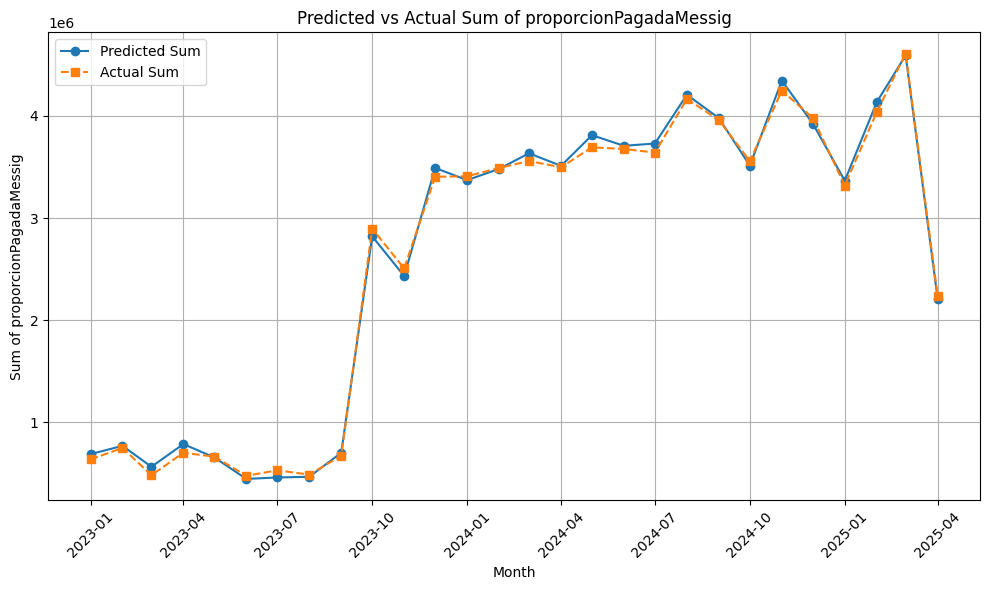

In [82]:
import matplotlib.pyplot as plt
import pandas as pd



# Create a date column from year and month
results_df['date'] = pd.to_datetime(results_df[['year', 'month']].assign(day=1))

# Plot predicted vs actual sum
plt.figure(figsize=(10, 6))
plt.plot(results_df['date'], results_df['predicted_sum'], marker='o', label='Predicted Sum')
plt.plot(results_df['date'], results_df['actual_sum'], marker='s',  linestyle='--', label='Actual Sum')
plt.title('Predicted vs Actual Sum of proporcionPagadaMessig')
plt.xlabel('Month')
plt.ylabel('Sum of proporcionPagadaMessig')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


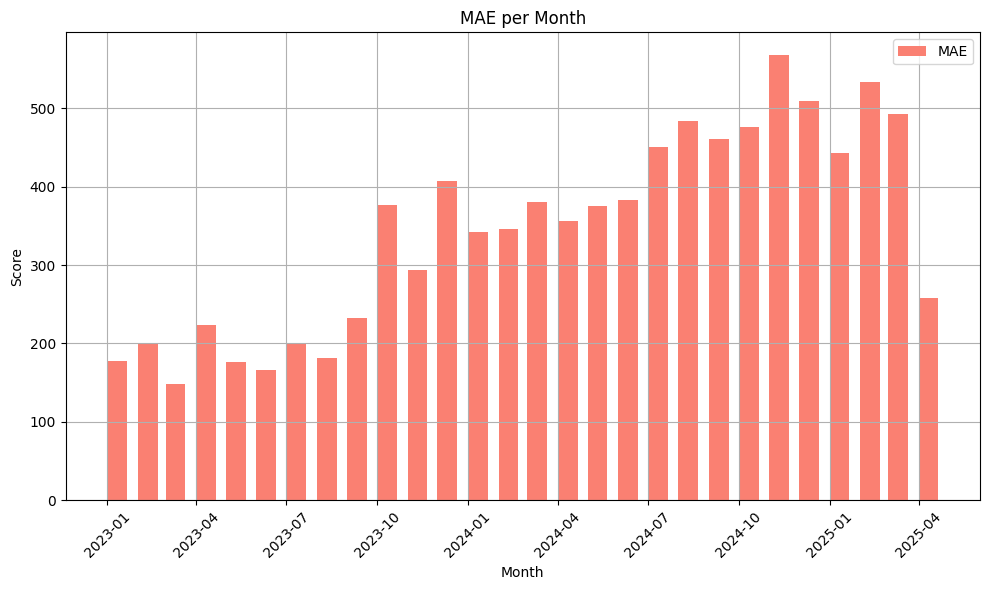

In [80]:
import matplotlib.pyplot as plt
import pandas as pd



# Create date column
results_df['date'] = pd.to_datetime(results_df[['year', 'month']].assign(day=1))

# Bar plot
fig, ax = plt.subplots(figsize=(10, 6))

x = results_df['date']
width = pd.Timedelta(days=10)

ax.bar(x + width, results_df['mae'], width=20, label='MAE', color='salmon')

ax.set_title('MAE per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Score')
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


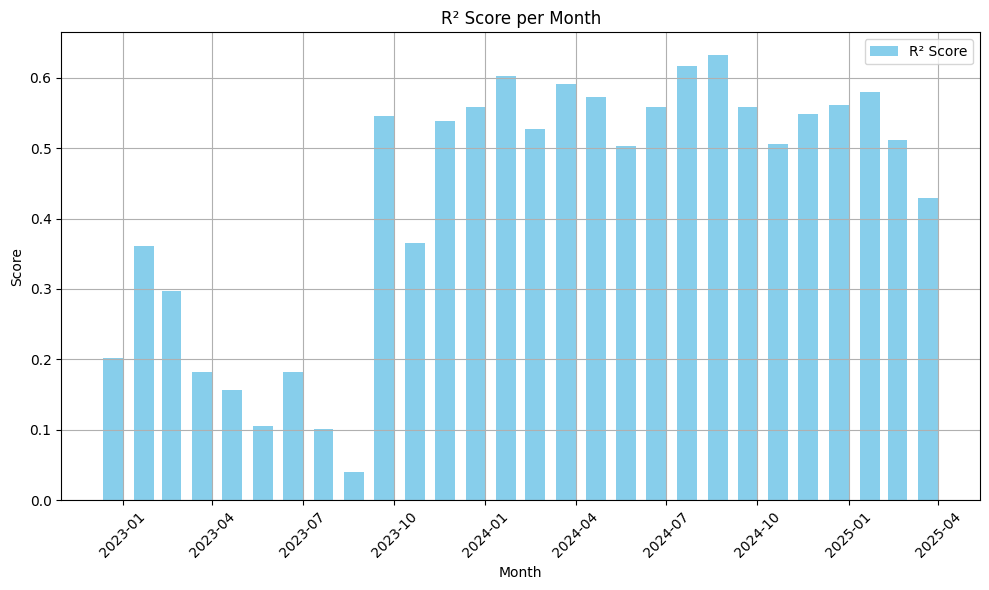

In [81]:
import matplotlib.pyplot as plt
import pandas as pd



# Create date column
results_df['date'] = pd.to_datetime(results_df[['year', 'month']].assign(day=1))

# Bar plot
fig, ax = plt.subplots(figsize=(10, 6))

x = results_df['date']
width = pd.Timedelta(days=10)

ax.bar(x - width, results_df['r2'], width=20, label='R² Score', color='skyblue')

ax.set_title('R² Score per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Score')
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()